In [2]:
import matplotlib.pyplot as plt # 3.7.2
import seaborn as sns # 0.12.2
import datetime # 5.2
import pandas as pd

In [3]:
from utils import Dataloader


path = 'data'
movies_df = Dataloader.load_movies(path)
ratings_df = Dataloader.load_ratings(path)
users_df = Dataloader.load_users(path)

print(movies_df)
print(ratings_df)
print(users_df)

      movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                            genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Drama  
3880                         D

In [4]:
# 1. movies_df

# 총 데이터 3883개
# 결측치, 이상치, 중복값 없음
# movieId는 수치형(범주형), title과 genres는 문자형
# movieId, title : 3883


movies_df

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
print(movies_df.info())
print(movies_df.describe())
print(movies_df.duplicated().sum())
print(movies_df['genres'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
           movieId
count  3883.000000
mean   1986.049446
std    1146.778349
min       1.000000
25%     982.500000
50%    2010.000000
75%    2980.500000
max    3952.000000
0
genres
Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1


In [6]:
print(movies_df['movieId'].value_counts())
print(movies_df['title'].value_counts())

movieId
1       1
2677    1
2649    1
2650    1
2651    1
       ..
1319    1
1320    1
1321    1
1322    1
3952    1
Name: count, Length: 3883, dtype: int64
title
Toy Story (1995)                           1
Buena Vista Social Club (1999)             1
Son of Frankenstein (1939)                 1
Ghost of Frankenstein, The (1942)          1
Frankenstein Meets the Wolf Man (1943)     1
                                          ..
Kids of Survival (1993)                    1
Alien³ (1992)                              1
American Werewolf in London, An (1981)     1
Amityville 1992: It's About Time (1992)    1
Contender, The (2000)                      1
Name: count, Length: 3883, dtype: int64


In [7]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [8]:
# 연도, 연대 컬럼 만들기
year = movies_df["title"].apply(lambda x : x[-5:-1])

e_movies_df = movies_df
e_movies_df["year"] = year


e_movies_df["year_term"] = movies_df["title"].apply(lambda x : x[-5 :-2] + "0")

# title에 연도 제거
e_movies_df['title'] = e_movies_df['title'].str.replace(pat=r'[^\w\s]', repl=r'', regex=True)
e_movies_df['title'] = e_movies_df['title'].str.replace(pat=r'[0-9]', repl=r'', regex=True)

e_movies_df

,movieId,title,genres,year,year_term
0,1,Toy Story,Animation|Children's|Comedy,1995,1990
1,2,Jumanji,Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men,Comedy|Romance,1995,1990
3,4,Waiting to Exhale,Comedy|Drama,1995,1990
4,5,Father of the Bride Part II,Comedy,1995,1990
...,...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000,2000
3879,3949,Requiem for a Dream,Drama,2000,2000
3880,3950,Tigerland,Drama,2000,2000
3881,3951,Two Family House,Drama,2000,2000


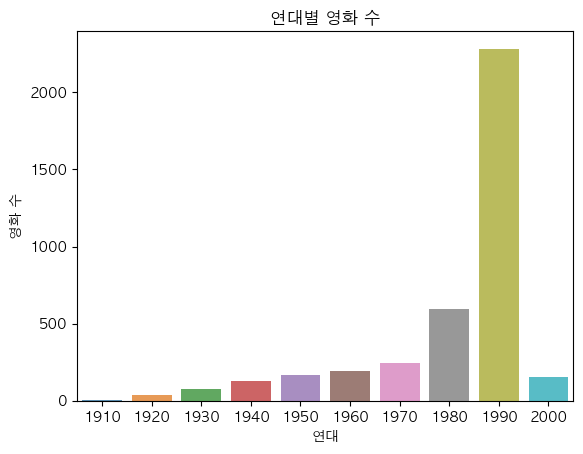

In [9]:
# 연대별 영화의 수
movie_year_term = e_movies_df["year_term"].value_counts().sort_index()
movie_year_term

# 연도별 영화 갯수
plt.rcParams['font.family'] = 'AppleGothic'  # Mac OS 기준 한글 폰트 설정
sns.barplot(x=movie_year_term.index, y=movie_year_term.values, alpha=0.8)
plt.title("연대별 영화 수")
plt.xlabel("연대")
plt.ylabel("영화 수")

plt.show()

In [10]:
# 장르들을 담을 딕셔너리
unique_genre_dict = {}

# 영화의 수만큼 반복된다.
for row in e_movies_df['genres'] : 
	# | 를 기준으로 문자열을 잘라준다.
    parsed_genre = row.split("|")
    
    # 장르의 수만큼 반복한다.
    for genre_name in parsed_genre : 
    	# 현재 장르의 이름으로 저장된 데이터가 없다면
        if (genre_name in unique_genre_dict) == False :
        	unique_genre_dict[genre_name] = 1
        else :
        	unique_genre_dict[genre_name] = unique_genre_dict[genre_name] + 1
            
            
unique_genre_dict

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

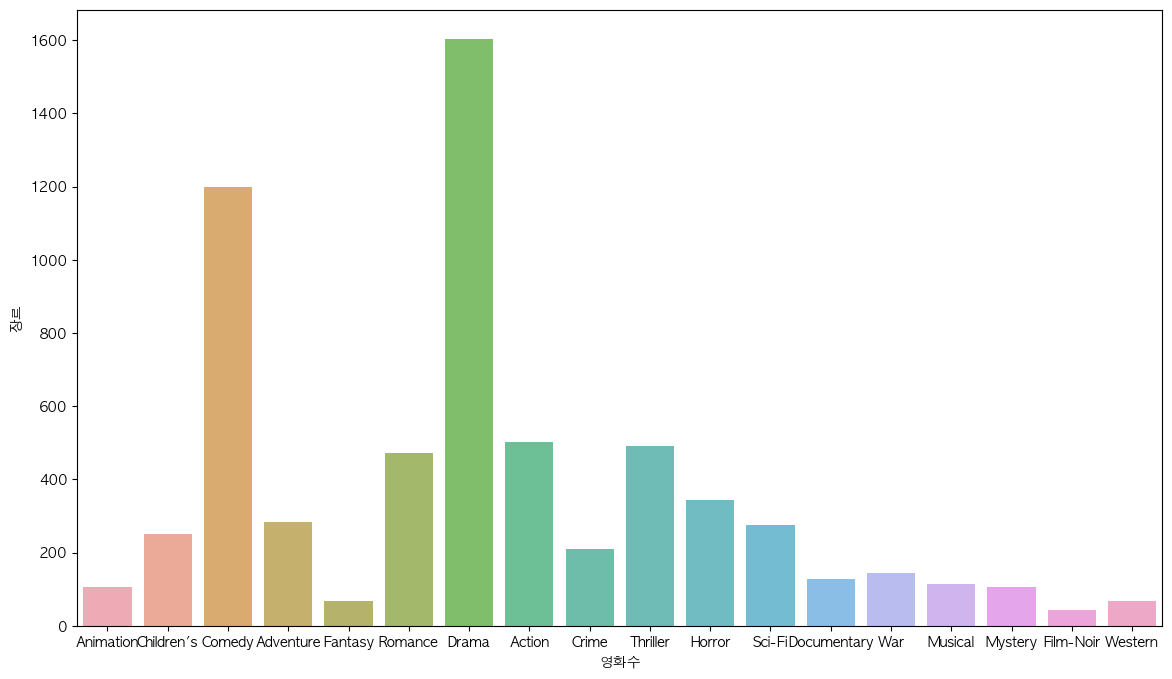

In [11]:
# 장르별 영화 수
x = list(unique_genre_dict.keys())
y = list(unique_genre_dict.values())
plt.figure(figsize=(14, 8)) 
sns.barplot(x=x, y=y, alpha=0.8)
plt.xlabel("영화수")
plt.ylabel("장르")
plt.show()

In [12]:
# 2. ratings_df

# 총 데이터 1,000,208개
# 결측치, 중복값, 이상치 없음
# 모든 특성 수치형, timestamp 제외 모두 범주형
# userId : 6040, movieId : 3706, rating : 1~5
# 타임스탬프는 초단위로 측정되어 표기됨
# 각 유저는 최소한 20개 이상의 평점 기록을 가지고 있음
# 유저들은 2000-04-25 23:05:32 ~ 2003-02-28 17:49:50까지 평점을 부여함

# 타임스탬프..? 유저가 해당 영화를 보고 평점을 내린 시간 정보. 시간이 지날수록 rating이 올라갔느냐, 적어졌느냐.
# timestamp 컬럼은 영화 평가가 이루어진 시간을 나타내는 값입니다. 이 컬럼은되어 있습니다.
# Unix 시간은 1970년 1월 1일 00:00:00 (UTC)부터 경과한 시간을 초 단위로 표현한 값입니다.

# 전처리
ratings_df

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
# impersonal.py 파일 : ratings_df 사용
# movieId별로 각 컬럼을 카운팅 -> userId 컬럼만 추출해서 내림차순으로 정렬 -> 인덱스만 뽑아서 리스트 만들고 -> 최상단 5개 출력

ratings_df.groupby('movieId').count()['userId'].sort_values(ascending=False).index.tolist()[:5]

[2858, 260, 1196, 1210, 480]

In [ ]:
print(ratings_df.info())
print(ratings_df.describe())
print(ratings_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None
             userId       movieId        rating     timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09
0


In [ ]:
print(ratings_df['userId'].value_counts())

userId
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: count, Length: 6040, dtype: int64


In [ ]:
print(ratings_df['movieId'].value_counts())
print(ratings_df['rating'].value_counts())

movieId
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: count, Length: 3706, dtype: int64
rating
4    348971
3    261197
5    226310
2    107557
1     56174
Name: count, dtype: int64


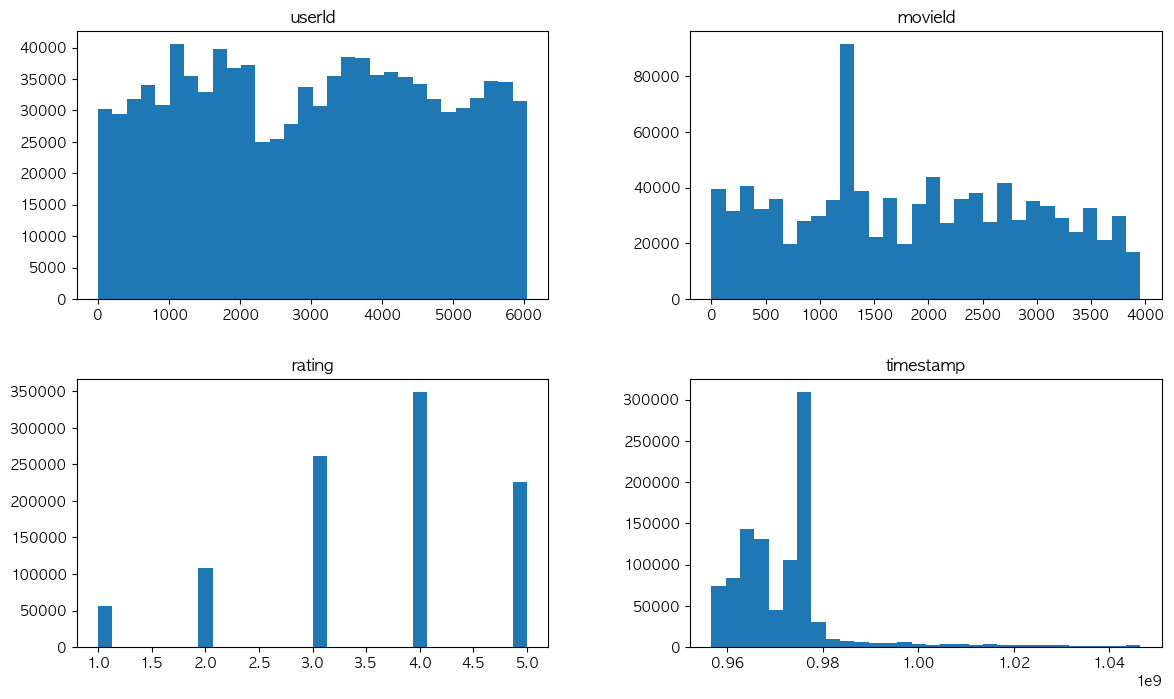

In [ ]:
# 데이터 분포 확인
ratings_df.iloc[:].hist(bins=30, figsize=(14,8), grid=False)
plt.show()

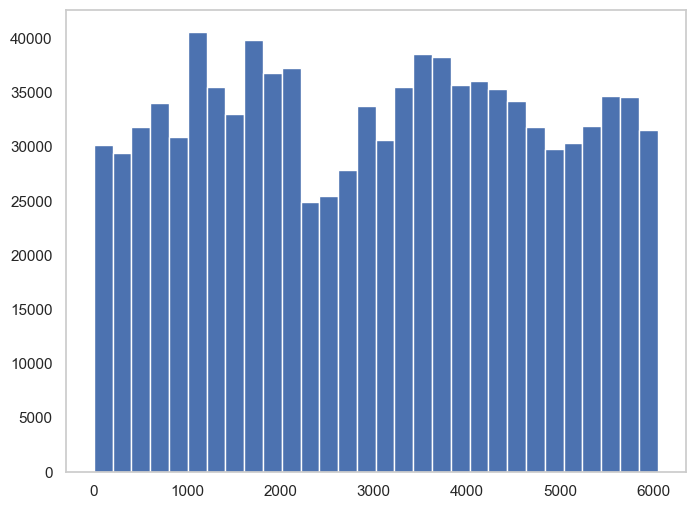

In [ ]:
# 유저 아이디는 1개씩으로 unique한 값을 가지되, 동 그래프에서는 특정 구간별로 아이디 갯수를 나눴기에 아이디 분포가 많은 것처럼 보임.
# 아이디 분포는 비슷하지만, 2200~2800대의 아이디 분포가 비교적 적음

ratings_df['userId'].hist(bins=30, figsize=(8,6), grid=False)
plt.show()

In [ ]:
# user들의 평균 ratings
user_rating = ratings_df.groupby('userId')['rating'].mean()
user_rating.mean()

3.702704866999724

In [ ]:
# timestamp의 unix시간을 날짜로 변환

unix_timestamp = ratings_df['timestamp']
edited_ratings_df = ratings_df

timestamp = []
for i in edited_ratings_df['timestamp']:
    timestamp.append(datetime.datetime.utcfromtimestamp(i))

edited_ratings_df['converted_timestamp'] = timestamp
edited_ratings_df

,userId,movieId,rating,timestamp,converted_timestamp
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11
...,...,...,...,...,...
1000204,6040,1091,1,956716541,2000-04-26 02:35:41
1000205,6040,1094,5,956704887,2000-04-25 23:21:27
1000206,6040,562,5,956704746,2000-04-25 23:19:06
1000207,6040,1096,4,956715648,2000-04-26 02:20:48


In [ ]:
edited_ratings_df['converted_timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000209 entries, 0 to 1000208
Series name: converted_timestamp
Non-Null Count    Dtype         
--------------    -----         
1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.6 MB


In [ ]:
edited_ratings_df['converted_timestamp'] = edited_ratings_df['converted_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
edited_ratings_df['converted_timestamp'] = edited_ratings_df['converted_timestamp'].str.replace('[^\d]', '', regex=True)


In [ ]:
# 연도, 월, 일로 자름
edited_ratings_df['converted2_timestamp'] = edited_ratings_df['converted_timestamp'].str[:9]
edited_ratings_df

,userId,movieId,rating,timestamp,converted_timestamp,converted2_timestamp
0,1,1193,5,978300760,20001231221240,200012312
1,1,661,3,978302109,20001231223509,200012312
2,1,914,3,978301968,20001231223248,200012312
3,1,3408,4,978300275,20001231220435,200012312
4,1,2355,5,978824291,20010106233811,200101062
...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,20000426023541,200004260
1000205,6040,1094,5,956704887,20000425232127,200004252
1000206,6040,562,5,956704746,20000425231906,200004252
1000207,6040,1096,4,956715648,20000426022048,200004260


/Users/nayeon/miniforge3/envs/tp2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeon/miniforge3/envs/tp2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeon/miniforge3/envs/tp2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeon/miniforge3/envs/tp2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53484 (\N{HANGUL SYLLABLE TAEM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeon/miniforge3/envs/tp2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE P

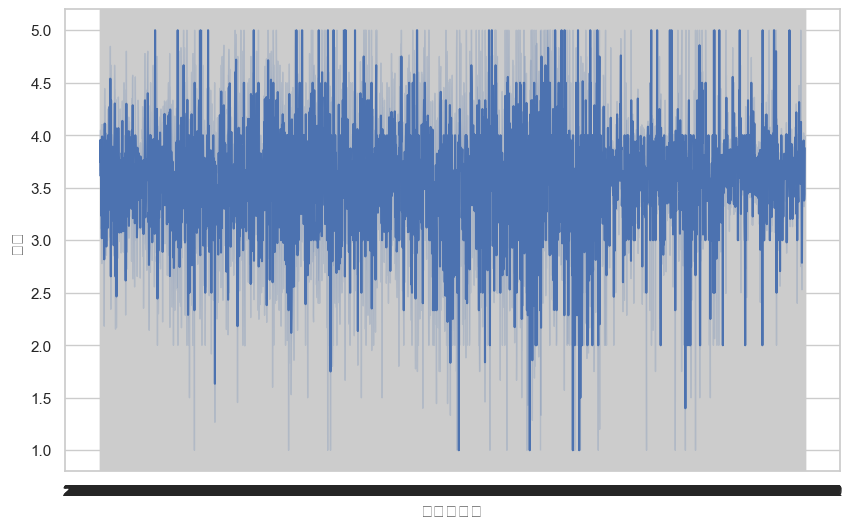

In [ ]:
# 타임스탬프. 시간이 지날수록 rating이 올라갔느냐, 적어졌느냐 시각화

x = edited_ratings_df['converted2_timestamp']
y = edited_ratings_df['rating']


# plt.figure(figsize=(14, 8)) 
# sns.barplot(x=x, y=y, alpha=0.8)
# plt.xlabel("타임스탬프")
# plt.ylabel("평점")
# plt.show()

# 데이터셋과 스타일 설정
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 라인플롯 그리기
sns.lineplot(x=x, y=y)

# 그래프 제목과 축 레이블 설정
plt.xlabel("타임스탬프")
plt.ylabel("평점")

# 그래프 표시
plt.show()

In [ ]:
# 3. users_df

# 총 6040개 데이터
# 결측치, 중복값, 이상치 없음
# userId, age, Occupation은 수치형, gender와 zip_code는 문자형. 모두 범주형 데이터.
# userId : 6040, zip_code는 3439 => 같은 우편번호를 가진 사람들은 한 집에 살고 있을 확률 높을 듯?
# gender는 2, age는 7, Occupation은 21개의 범주


users_df

,userId,gender,age,Occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
print(users_df.info())
print(users_df.describe())
print(users_df.duplicated().sum())
print(users_df['gender'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB
None
            userId          age   Occupation
count  6040.000000  6040.000000  6040.000000
mean   3020.500000    30.639238     8.146854
std    1743.742145    12.895962     6.329511
min       1.000000     1.000000     0.000000
25%    1510.750000    25.000000     3.000000
50%    3020.500000    25.000000     7.000000
75%    4530.250000    35.000000    14.000000
max    6040.000000    56.000000    20.000000
0
gender
M    4331
F    1709
Name: count, dtype: int64


In [ ]:
# unique한 데이터 갯수
print(users_df['userId'].value_counts())
print(users_df['age'].value_counts())
print(users_df['Occupation'].value_counts())
print(users_df['zip_code'].value_counts())

userId
1       1
4024    1
4033    1
4032    1
4031    1
       ..
2012    1
2011    1
2010    1
2009    1
6040    1
Name: count, Length: 6040, dtype: int64
age
25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: count, dtype: int64
Occupation
4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: count, dtype: int64
zip_code
48104    19
22903    18
55104    17
94110    17
55455    16
         ..
80236     1
19428     1
33073     1
99005     1
14706     1
Name: count, Length: 3439, dtype: int64


In [ ]:
# 이상치 없음
print(users_df['Occupation'].describe())
print(users_df['age'].describe())
print(users_df['gender'].describe())

count    6040.000000
mean        8.146854
std         6.329511
min         0.000000
25%         3.000000
50%         7.000000
75%        14.000000
max        20.000000
Name: Occupation, dtype: float64
count    6040.000000
mean       30.639238
std        12.895962
min         1.000000
25%        25.000000
50%        25.000000
75%        35.000000
max        56.000000
Name: age, dtype: float64
count     6040
unique       2
top          M
freq      4331
Name: gender, dtype: object


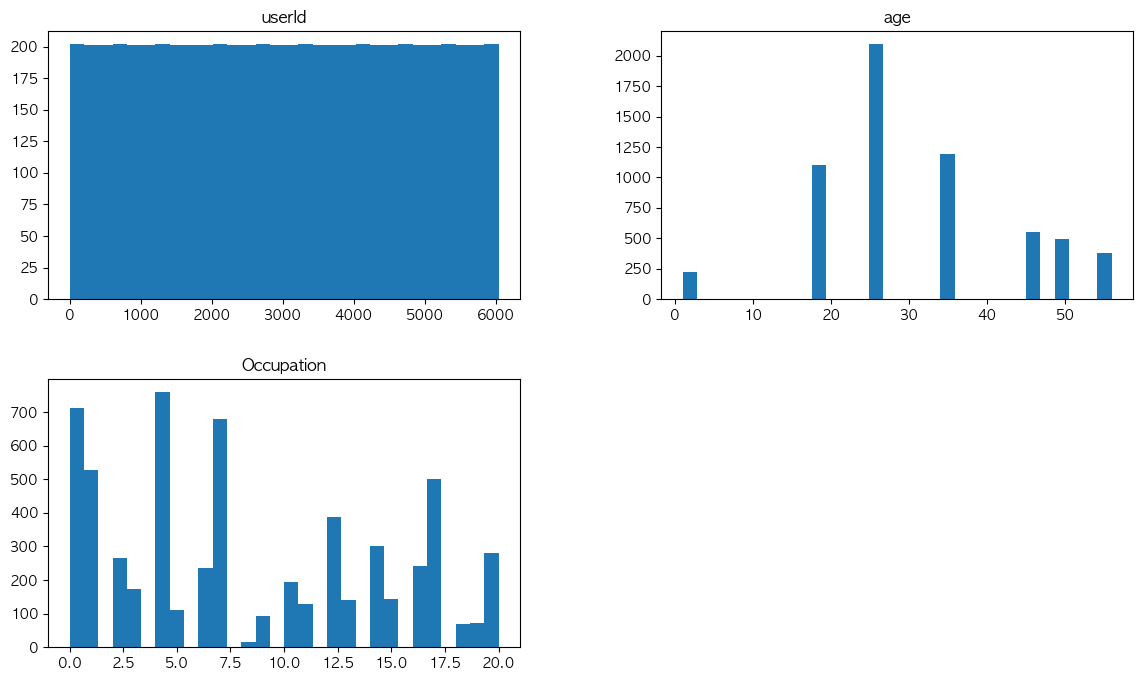

In [ ]:
# 데이터 분포 확인
users_df.iloc[:].hist(bins=30, figsize=(14,8), grid=False)
plt.show()

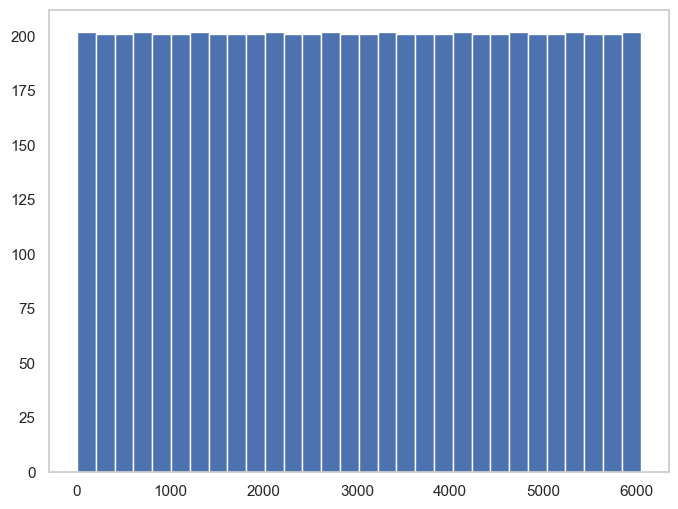

In [ ]:
# 유저 아이디는 1개씩으로 unique한 값을 가지되, 동 그래프에서는 특정 구간별로 아이디 갯수를 나눴기에 아이디 분포가 많은 것처럼 보임.
# 아이디 분포는 거의 같음

users_df['userId'].hist(bins=30, figsize=(8,6), grid=False)
plt.show()

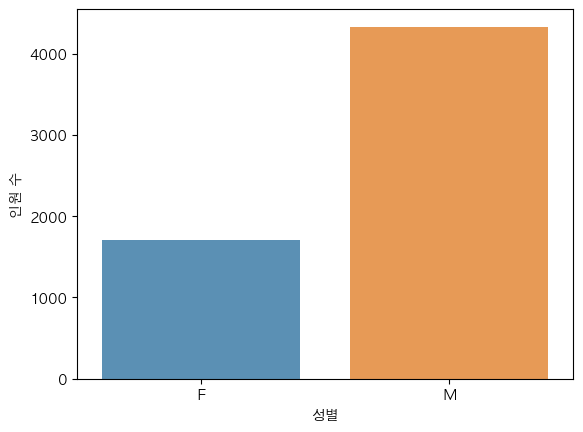

In [ ]:
# 성별 비율
# 이상치도 없음
gender = users_df['gender'].value_counts().sort_index()

x = gender.index
y = gender.values
sns.barplot(x=x, y=y, alpha=0.8)
plt.xlabel("성별")
plt.ylabel("인원 수")
plt.show()